In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
df_org = pd.read_csv('data/train.csv')
df = df_org.copy()

In [3]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
df.shape

(1628, 29)

In [5]:
df.dtypes

Id                          int64
Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [6]:
df.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

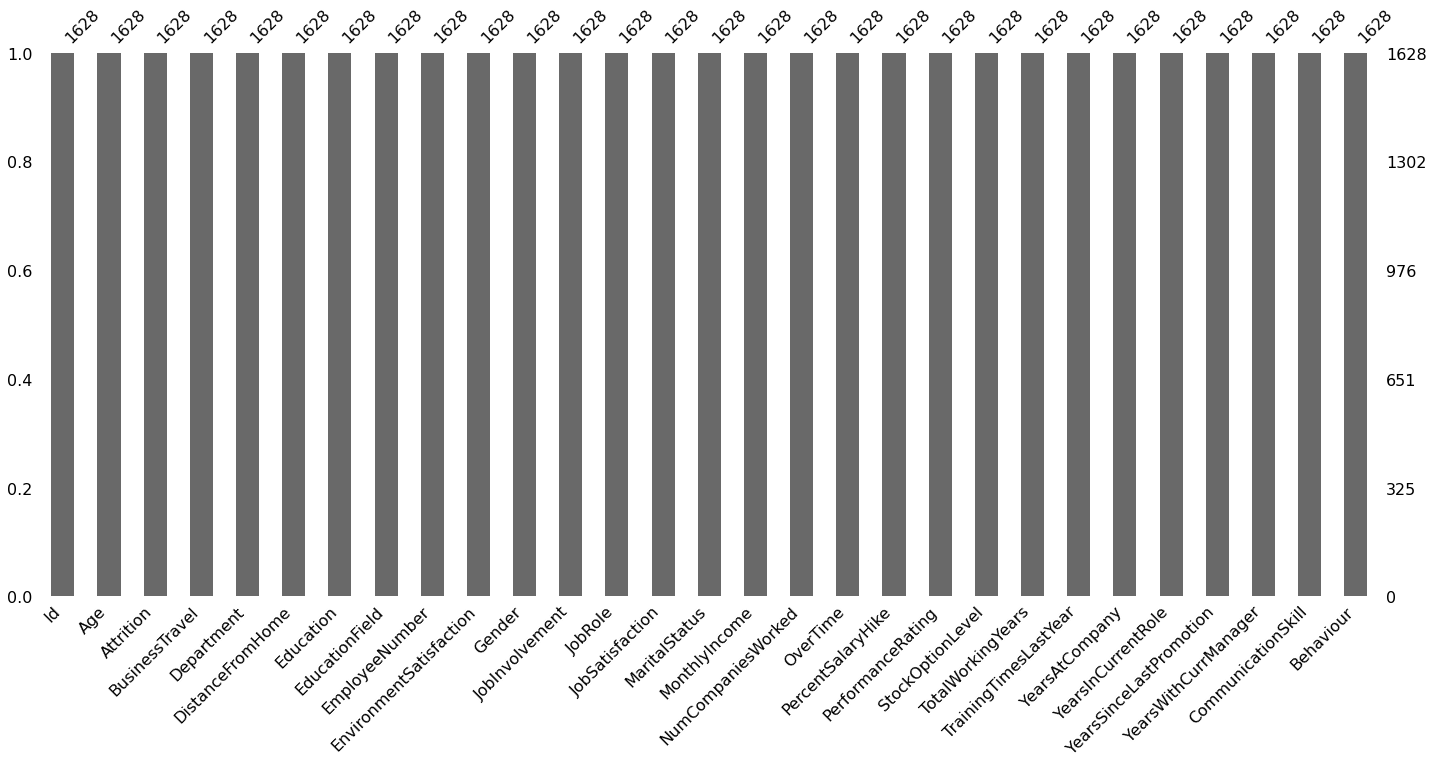

In [8]:
msno.bar(df)

In [9]:
import pandas_profiling
profile = df.profile_report(title='Employee_Attrition_Profile_Dataset')
!mkdir Profile_Report
profile.to_file(output_file='Profile_Report/Employee_Attrition_Report_1.html')

mkdir: Profile_Report: File exists


In [10]:
no_use_cols = ['Id']
df.drop(no_use_cols, inplace=True, axis=1)

In [11]:
df.shape

(1628, 28)

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(1000, 28)

In [13]:
df.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,36.883000,0.157000,9.145000,2.912000,1020.605000,2.728000,2.727000,2.745000,6464.418000,2.704000,...,3.153000,0.791000,11.229000,2.841000,6.979000,4.225000,2.152000,4.058000,3.041000,1.0
std,9.125052,0.363983,8.120956,1.028257,606.009713,1.095087,0.703538,1.085889,4685.919516,2.490499,...,0.360168,0.850907,7.766652,1.300542,6.232608,3.698115,3.199865,3.598831,1.413973,0.0
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,30.000000,0.000000,2.000000,2.000000,491.000000,2.000000,2.000000,2.000000,2874.000000,1.000000,...,3.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000,1.0
50%,36.000000,0.000000,7.000000,3.000000,1008.000000,3.000000,3.000000,3.000000,4877.500000,2.000000,...,3.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000,1.0
75%,43.000000,0.000000,13.000000,4.000000,1569.750000,4.000000,3.000000,4.000000,8393.000000,4.000000,...,3.000000,1.000000,15.000000,3.000000,9.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [14]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [15]:
nominal_columns = df.select_dtypes(include=['object']).columns.tolist()
nominal_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [16]:
cont_columns = ['Age','DistanceFromHome','EmployeeNumber','MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears',
                 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
ordinal_columns = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','Education','Behaviour','CommunicationSkill','PerformanceRating','StockOptionLevel']

In [17]:
len(nominal_columns)+len(cont_columns)+len(ordinal_columns)

27

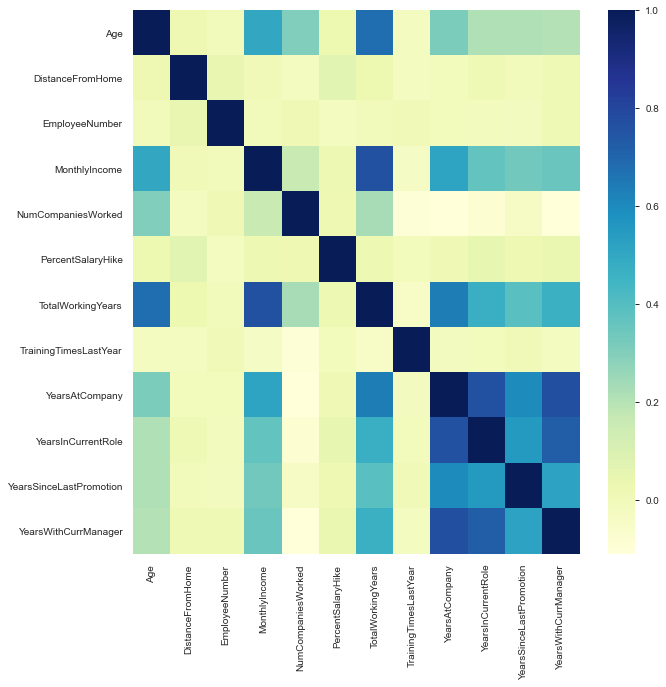

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df[cont_columns].corr(), cmap="YlGnBu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x146176ed0>,
      dtype=object)

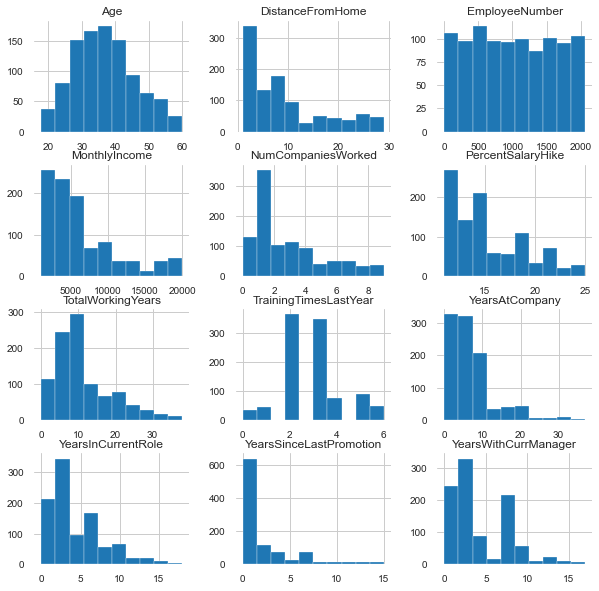

In [19]:
df[cont_columns].hist(figsize=(10,10))

- Age has a normal Distribution
- There are variables with exponential distribution.

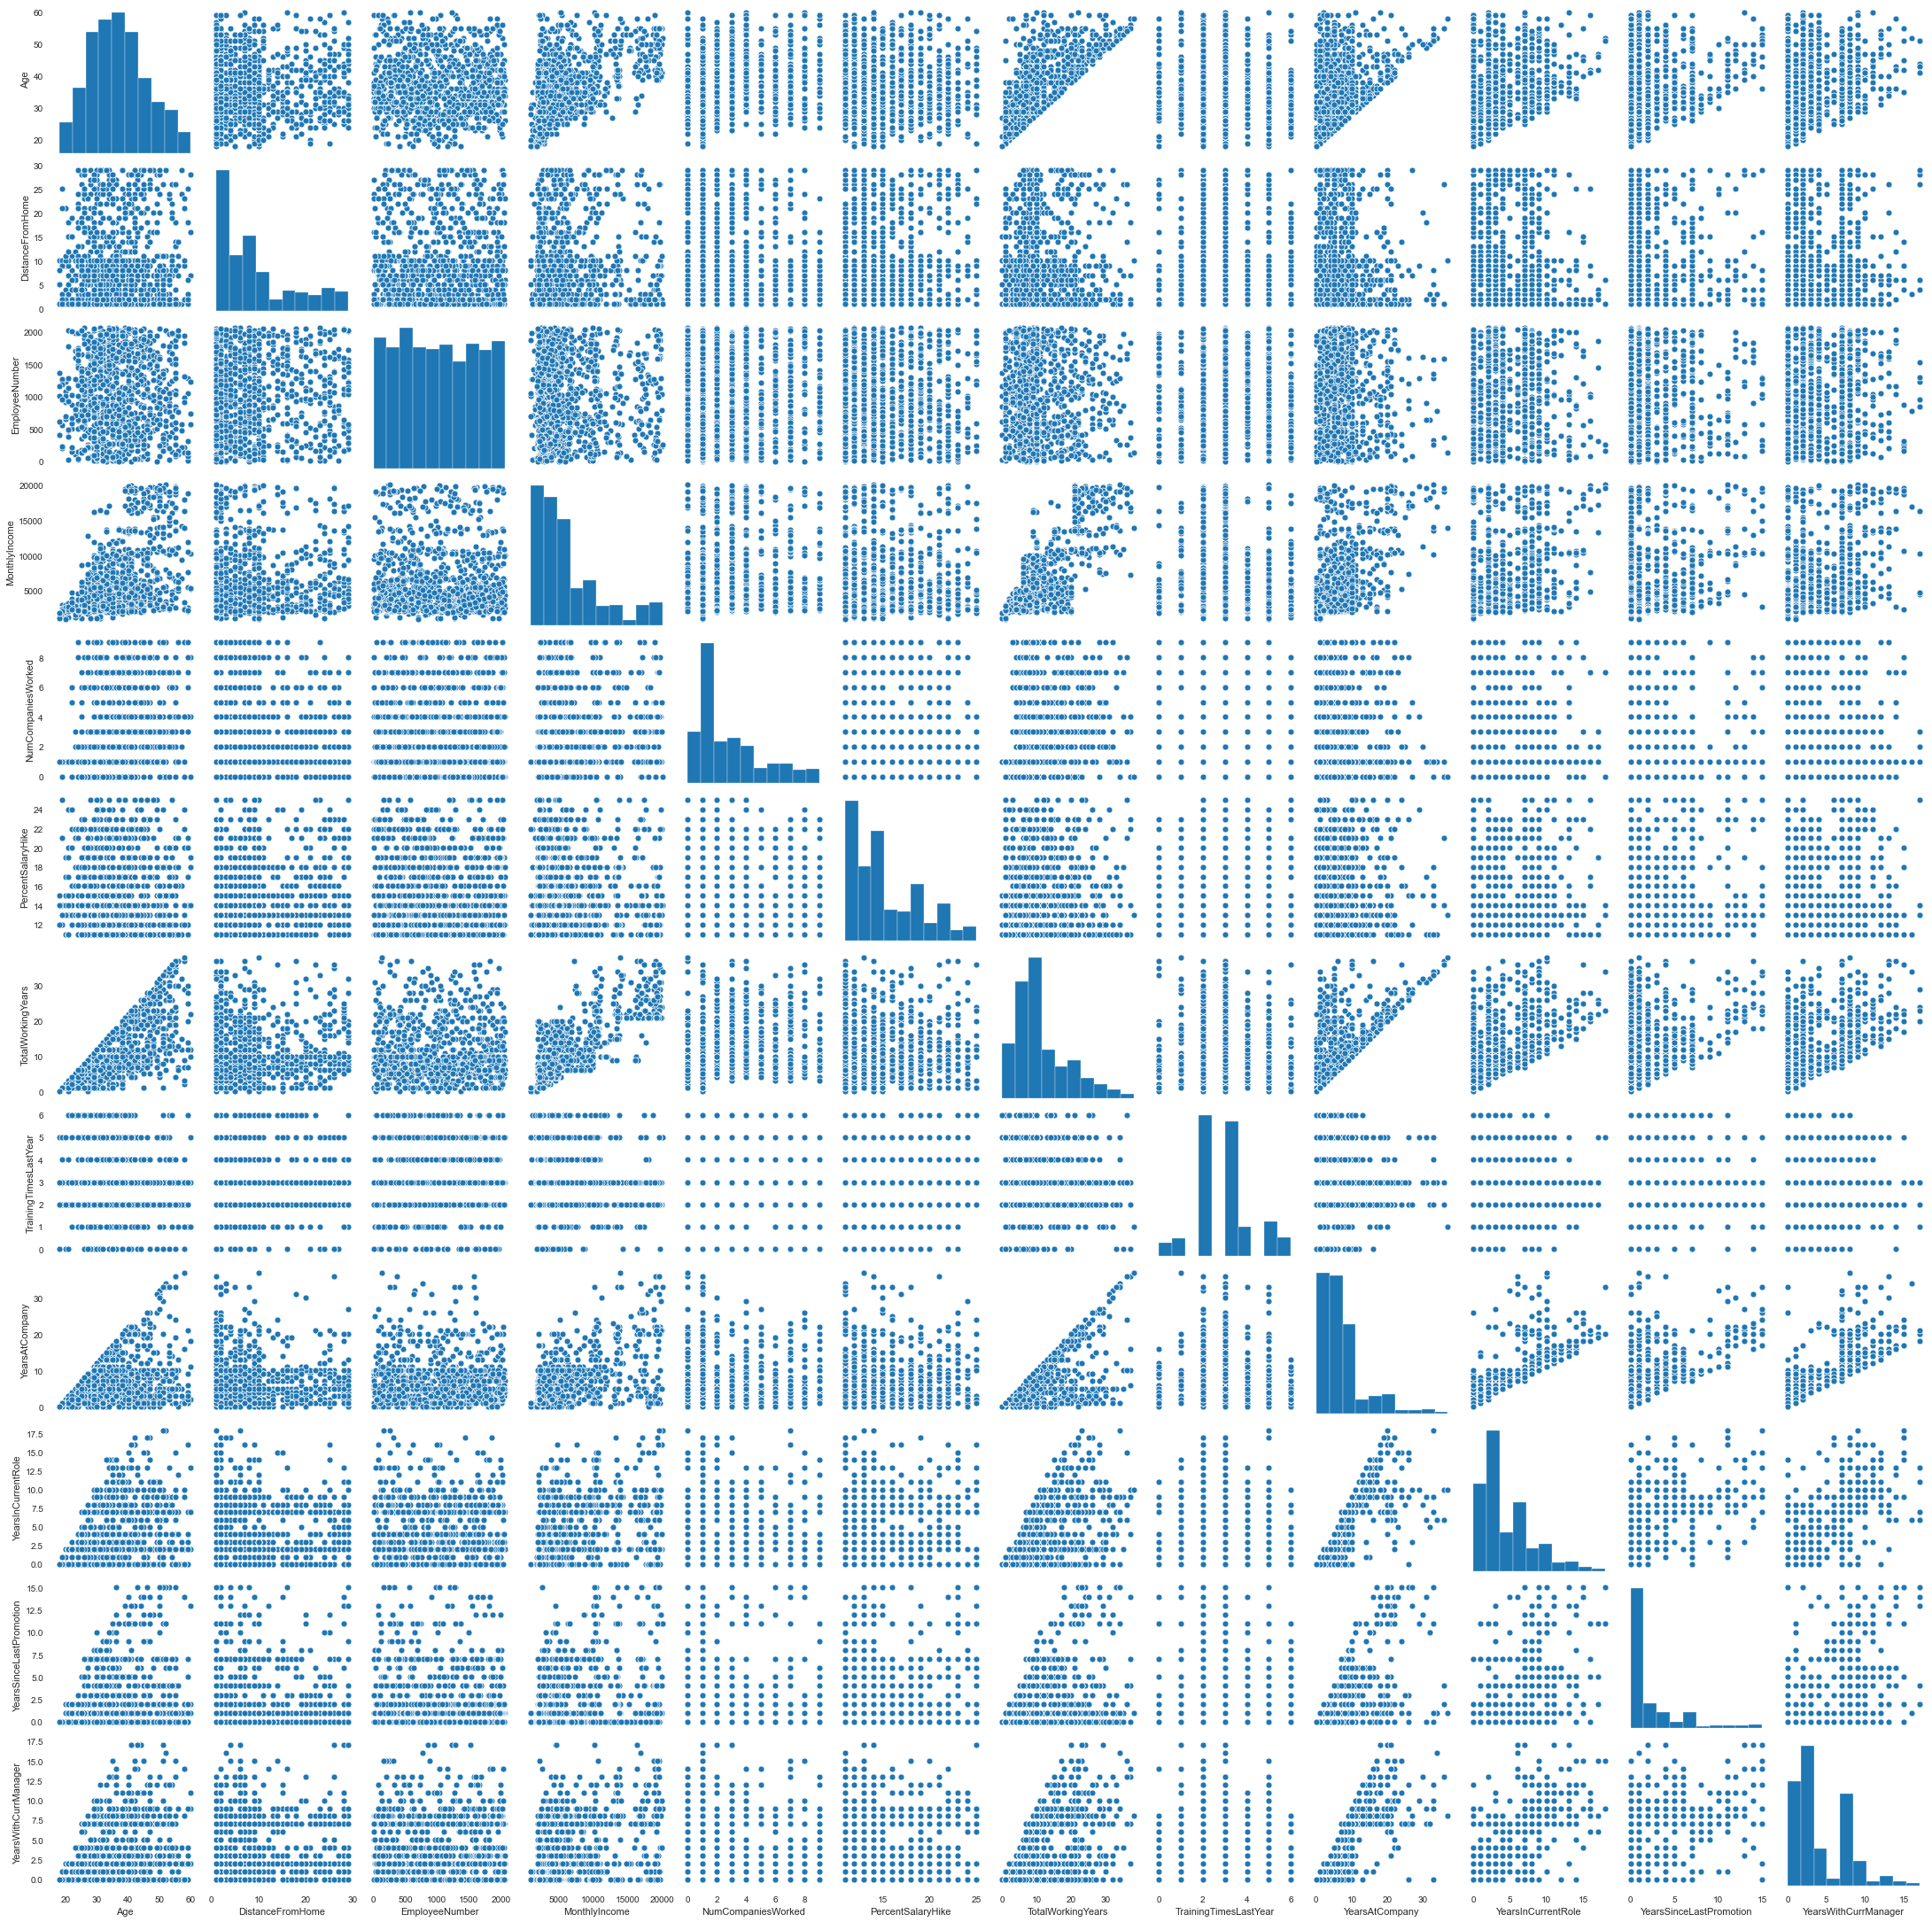

In [20]:
sns.pairplot(df[cont_columns])

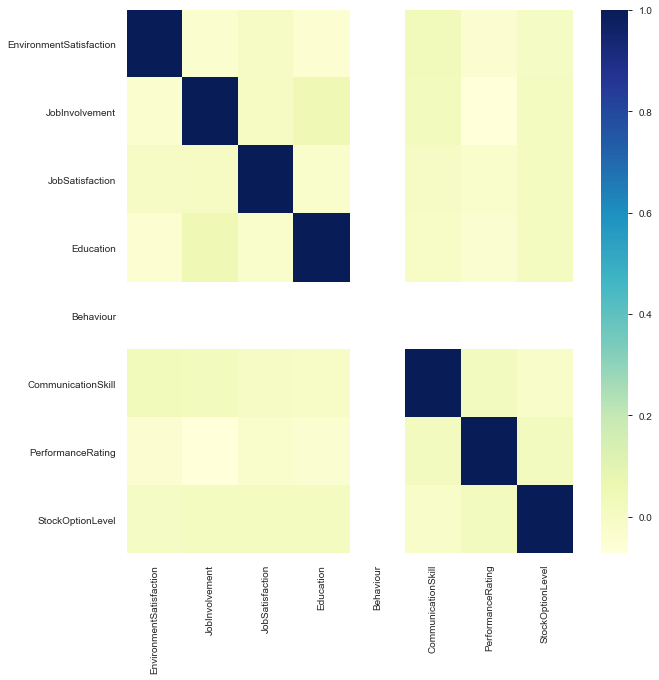

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df[ordinal_columns].corr(), cmap="YlGnBu")

Variables look good!

In [22]:
df.drop(['Behaviour'], inplace=True, axis = 1)
ordinal_columns.remove('Behaviour')

In [23]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CommunicationSkill'],
      dtype='object')

In [24]:
df_temp = pd.get_dummies(df, columns=['Attrition'])
for i in nominal_columns+ordinal_columns:
    m = df_temp.pivot_table(columns=i, values = ['Attrition_1','Attrition_0'], aggfunc=np.sum)
    m.loc['PercentAttrit'] = 0
    for a in m:
        m.loc['PercentAttrit'][a] = ((m[a][1])/(m[a][0]+m[a][1]))*100
    print(m)
    print("")

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition_0      85.000000         148.000000     610.000000
Attrition_1       7.000000          51.000000      99.000000
PercentAttrit     7.608696          25.628141      13.963329

Department     Human Resources  Research & Development       Sales
Attrition_0               36.0              564.000000  243.000000
Attrition_1                9.0               83.000000   65.000000
PercentAttrit             20.0               12.828439   21.103896

EducationField  Human Resources  Life Sciences  Marketing     Medical  \
Attrition_0                15.0     348.000000  82.000000  286.000000   
Attrition_1                 5.0      55.000000  23.000000   47.000000   
PercentAttrit              25.0      13.647643  21.904762   14.114114   

EducationField      Other  Technical Degree  
Attrition_0     50.000000         62.000000  
Attrition_1      7.000000         20.000000  
PercentAttrit   12.280702         24.390244  

Gender  

### Treat for Eyes Time!

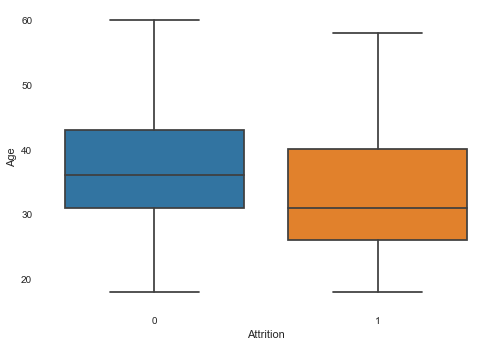

In [25]:
sns.boxplot(x = df.Attrition, y=df.Age)

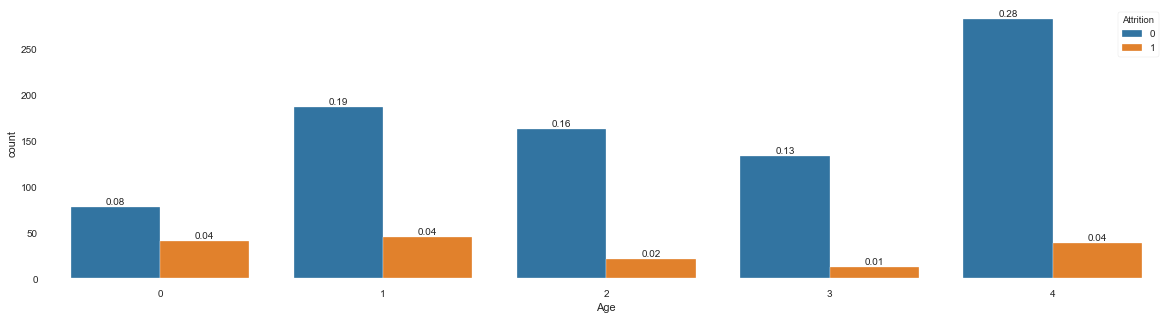

In [26]:
plt.figure(figsize=(20,5))
total = float(len(df))
ax = sns.countplot(x = pd.cut(df.Age, bins = [0,26,32,36,40,np.inf], labels=[0,1,2,3,4]), hue = df['Attrition'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

**We can infer that people in 20s, early 30s and above 40s are more likeyly to leave the job. Age is an important factor**

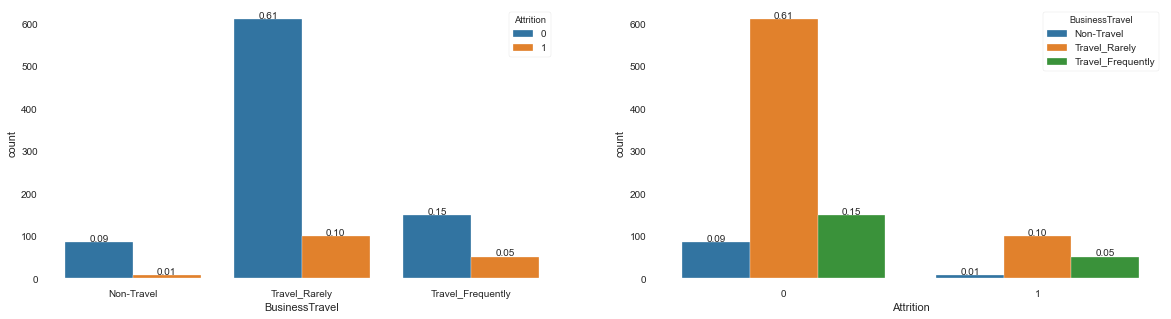

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = df.BusinessTravel, hue = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(hue = df.BusinessTravel, x = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

**Employees who have to travel frequently have higher attrition as compared to ones who travelrarely. In contrast, Non Travel employees have very low rate of attrition**

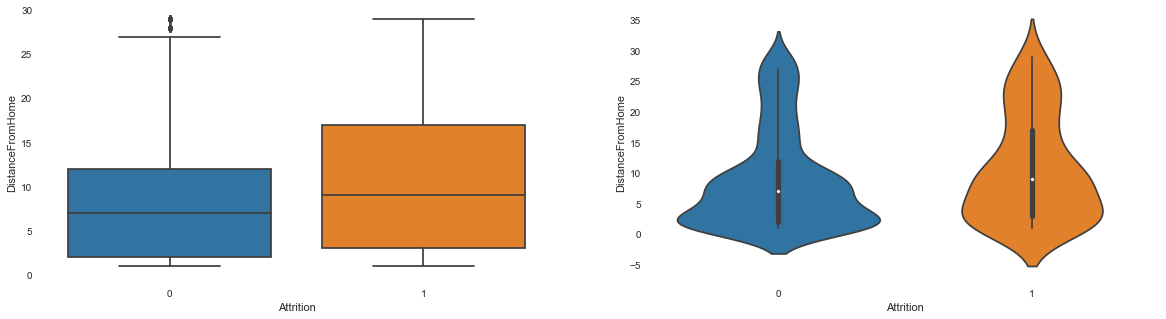

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.DistanceFromHome)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.DistanceFromHome)

**Employees who live far away from home have a higher rate of attrition.**

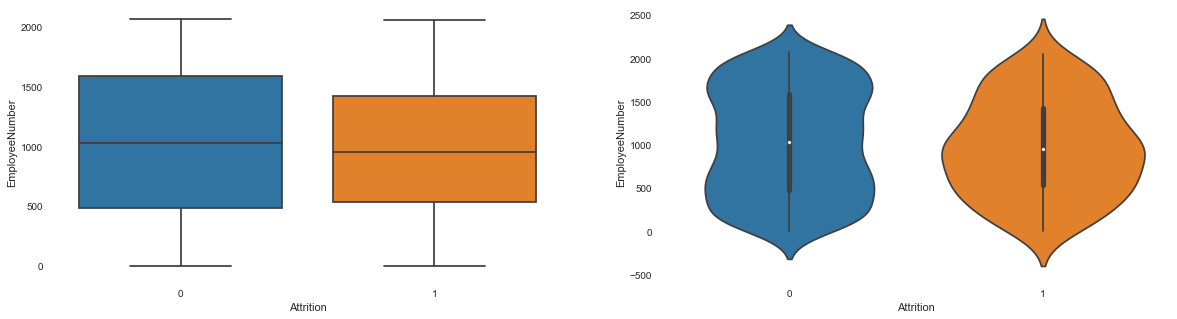

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.EmployeeNumber)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.EmployeeNumber)

**Attrition happens on evvery level here. Although there is slight difference in IQR.**

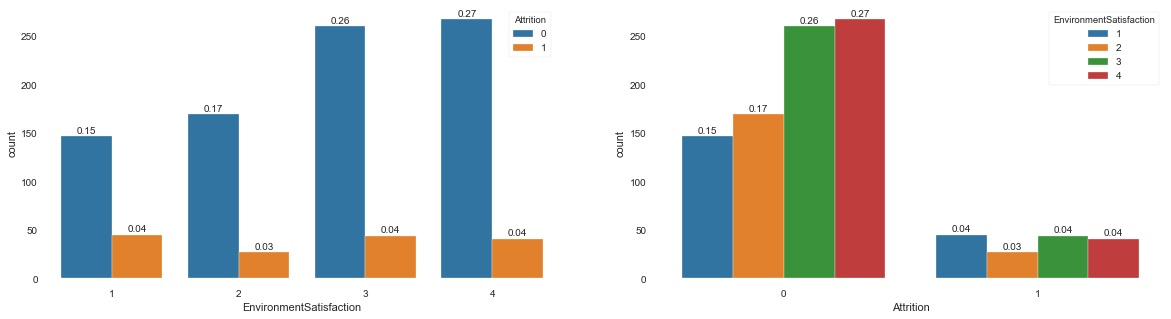

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = df.EnvironmentSatisfaction, hue = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(hue = df.EnvironmentSatisfaction, x = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

**There is higher attrition where there is low environment satisfaction. Attrition rate begins to decrease as we move towards high level of envrionment satisfaction. Alsmost similar at levels 3 and 4**

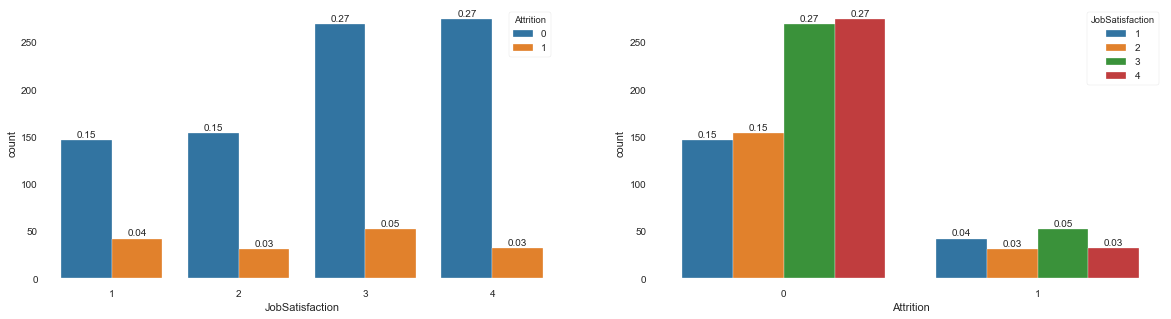

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = df.JobSatisfaction, hue = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(hue = df.JobSatisfaction, x = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

**Job Satisfaction distribution is almost identical to Environment Satisfaction**

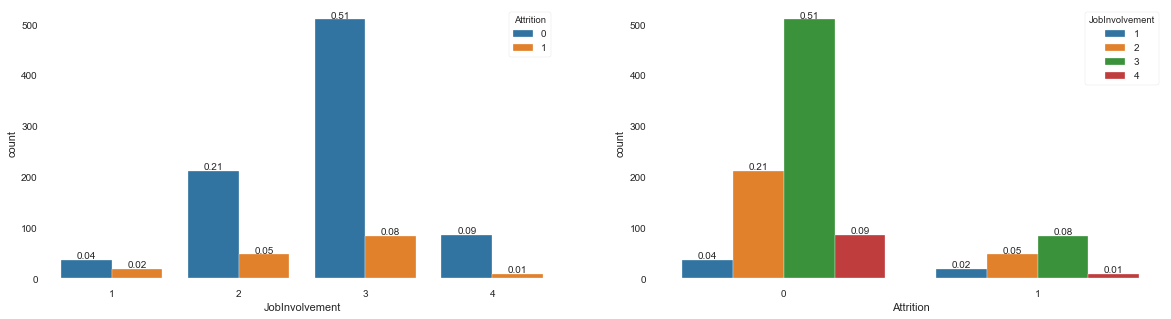

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = df.JobInvolvement, hue = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(hue = df.JobInvolvement, x = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

**Trend is somewhat similar. Attrtion Rate decreases as scale moves towards right.**

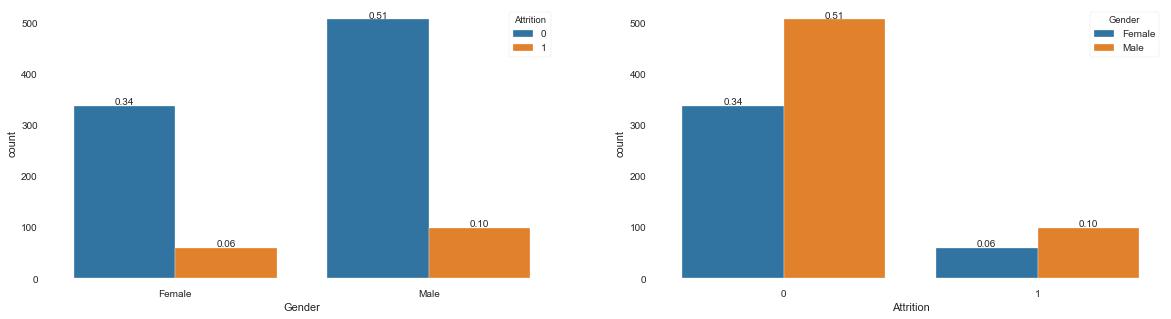

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = df.Gender, hue = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(hue = df.Gender, x = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

**Females have slightly lesser Attrition Rate than males**

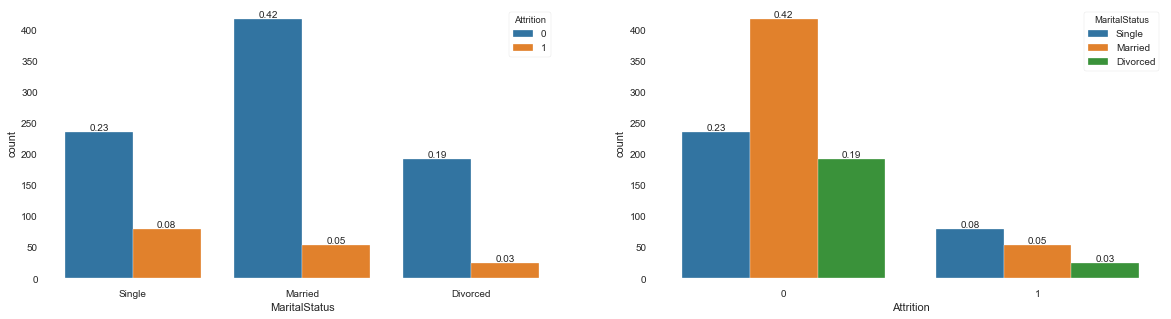

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = df.MaritalStatus, hue = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(hue = df.MaritalStatus, x = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

**Singles are more likely to leave job followed by Divorced. Married Employees are likely to stay**

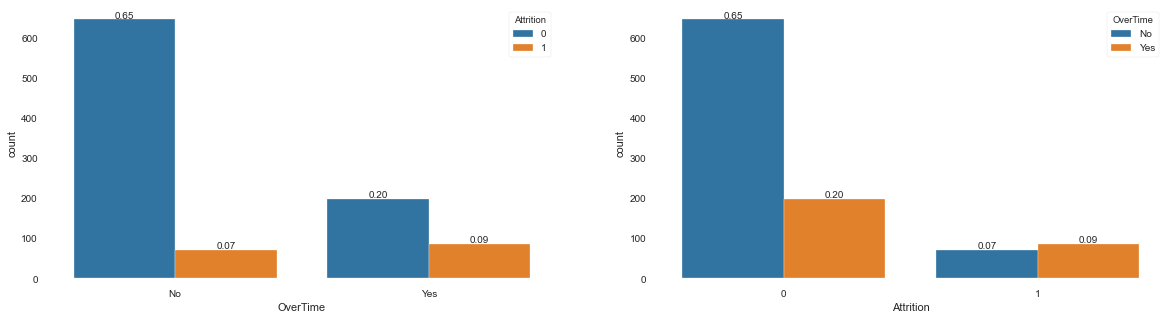

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = df.OverTime, hue = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(hue = df.OverTime, x = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

**Employees who do overtime are more likely to leave.**

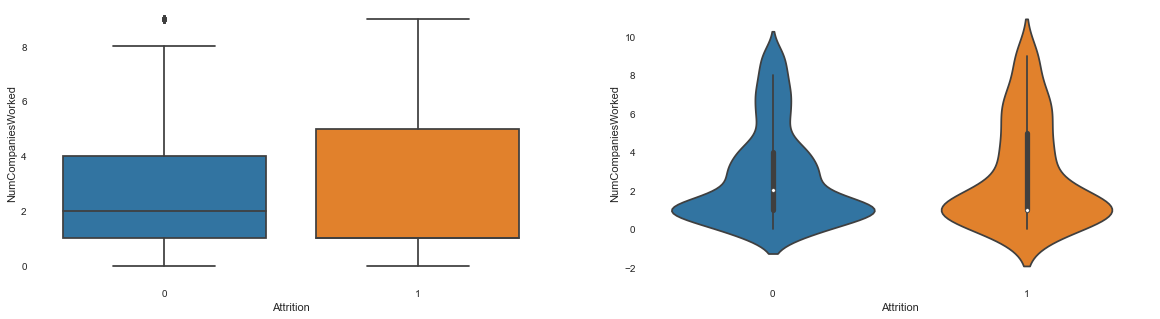

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.NumCompaniesWorked)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.NumCompaniesWorked)

**Employees who have jumped companies once are more likely to leave the job. Employees who jump companies alot are more like to leave.**

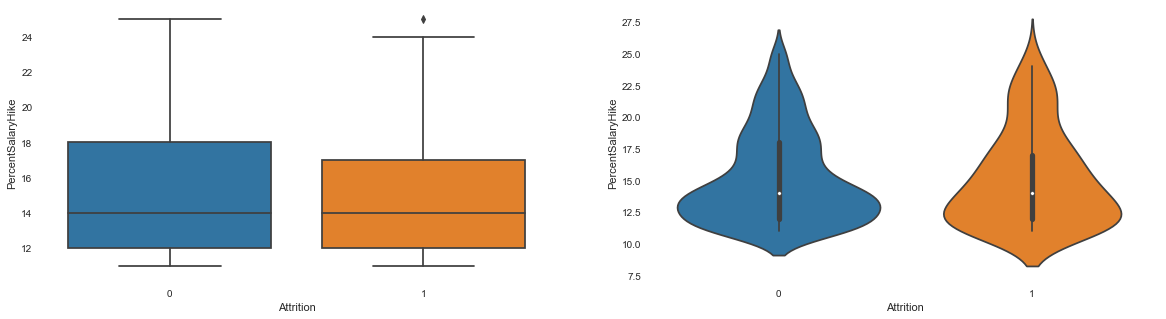

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.PercentSalaryHike)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.PercentSalaryHike)

**Distribution of Salary hike looks pretty much similar. On the higher side of hike, employees are likely to stay!**

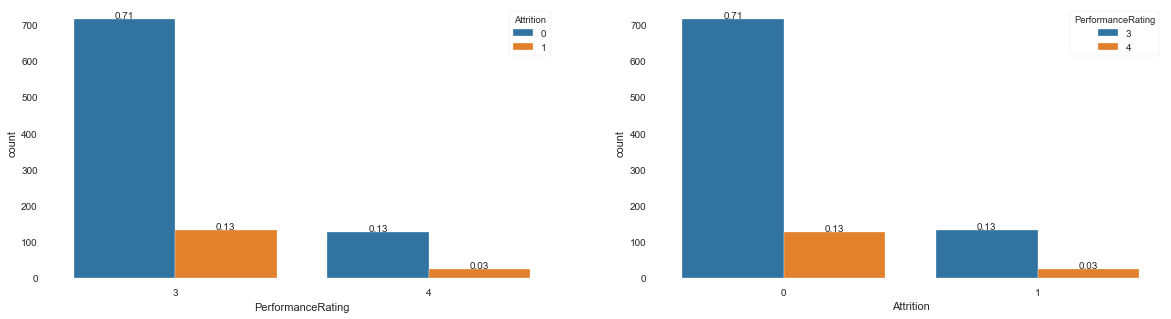

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = df.PerformanceRating, hue = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(hue = df.PerformanceRating, x = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

**All employyes have performance rating of either 3 or 4. Attrition at both levels look failry similar.**

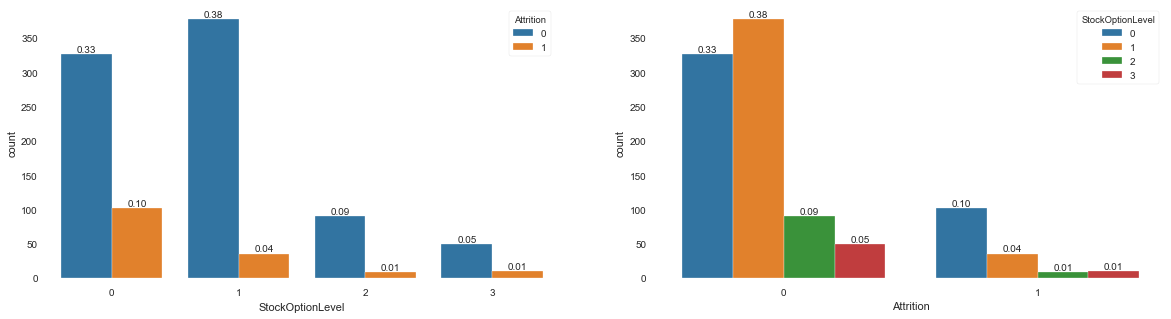

In [39]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = df.StockOptionLevel, hue = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(hue = df.StockOptionLevel, x = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

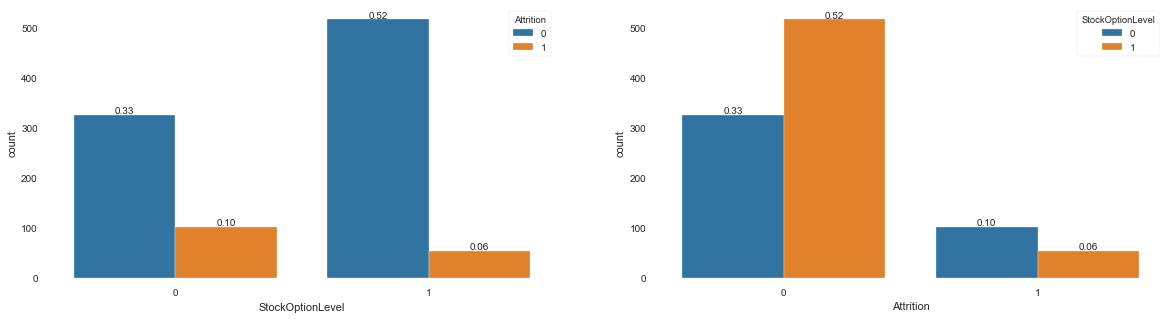

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = df.StockOptionLevel.apply(lambda x: 0 if x == 0 else 1), hue = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(hue = df.StockOptionLevel.apply(lambda x: 0 if x == 0 else 1), x = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

**Employees who own stocks are less likely to leave as compared to ones who don't have any**

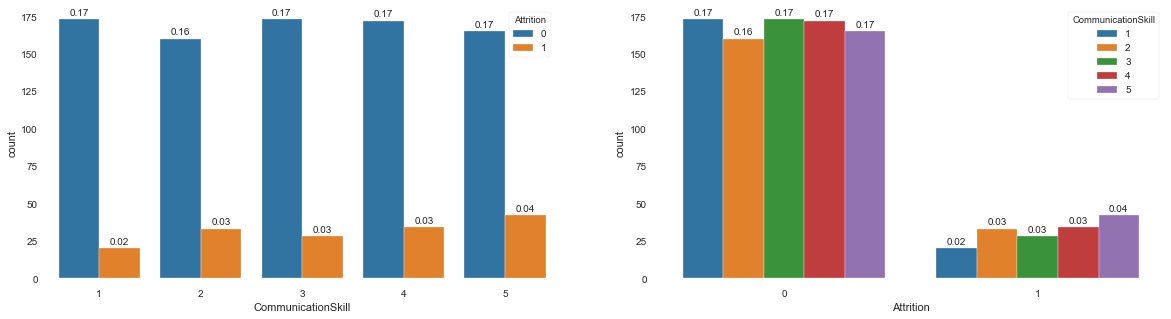

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = df.CommunicationSkill, hue = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(hue = df.CommunicationSkill, x = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

**Distribution is fairly similar at all levels with slight difference.** 

posx and posy should be finite values
posx and posy should be finite values


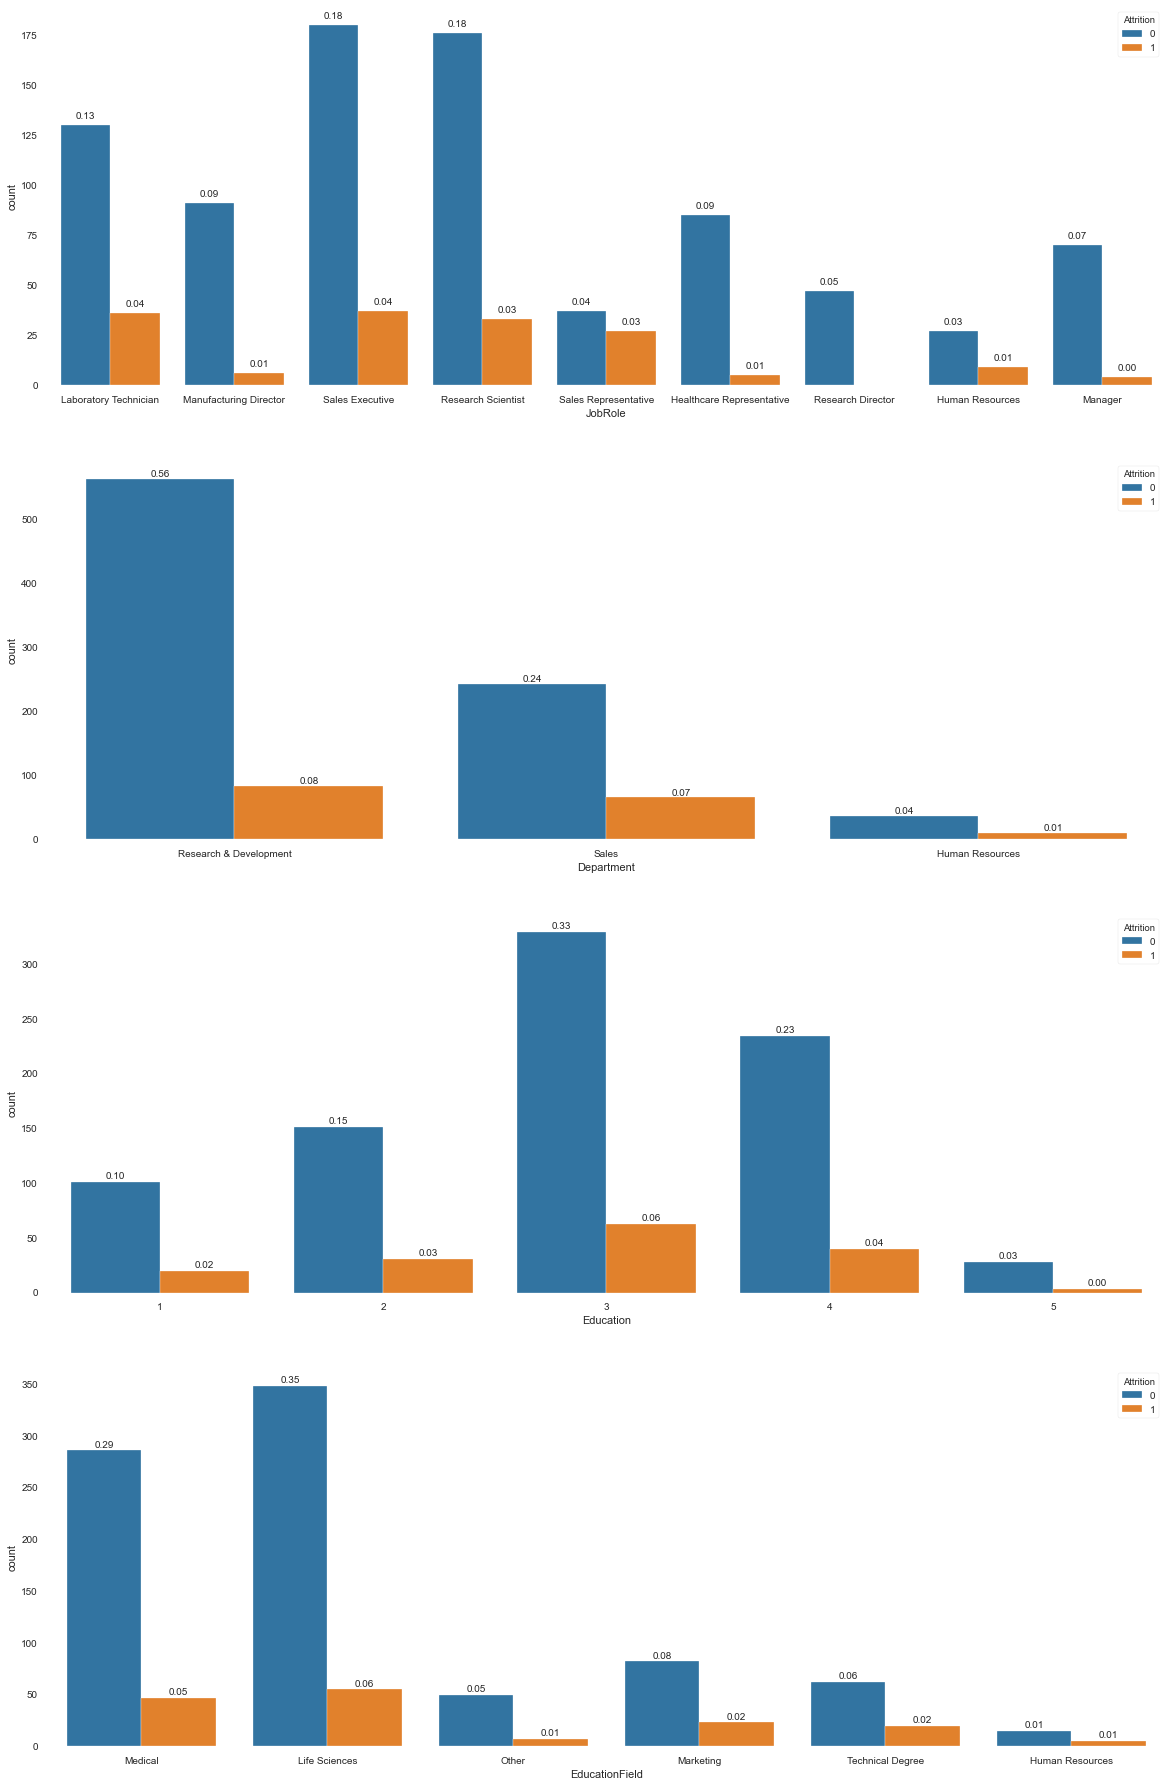

In [42]:
plt.figure(figsize=(20,32))
plt.subplot(4,1,1)
ax = sns.countplot(x = df.JobRole, hue=df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(4,1,2)
ax = sns.countplot(x = df.Department, hue=df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(4,1,3)
ax = sns.countplot(x = df.Education, hue=df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(4,1,4)
ax = sns.countplot(x = df.EducationField, hue=df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

**Due to High Correlation among Department and JobRole, we can drop Department. Also, Education doesn't affect attrition rate significantly.**

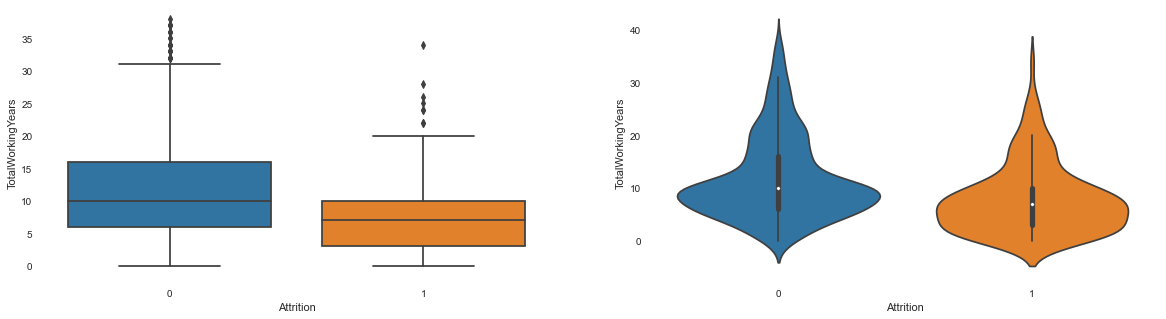

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.TotalWorkingYears)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.TotalWorkingYears)

**Employees in initial years of their working life are more likely to leave.**

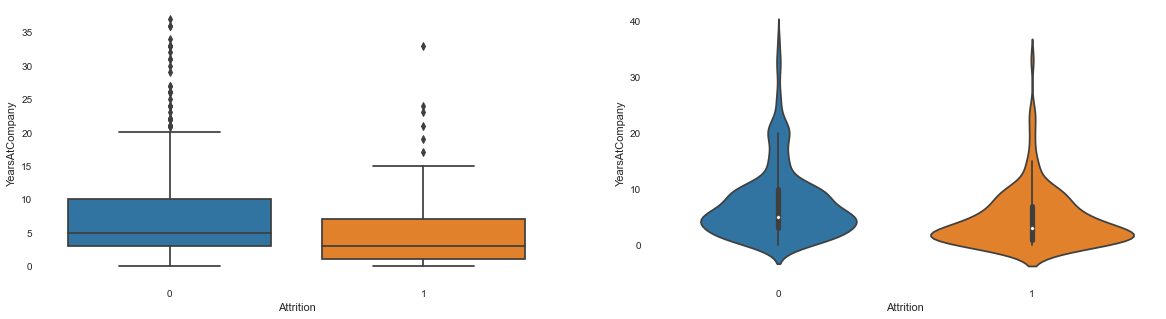

In [44]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.YearsAtCompany)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.YearsAtCompany)

**Employees in early years of company are more likely to leave**

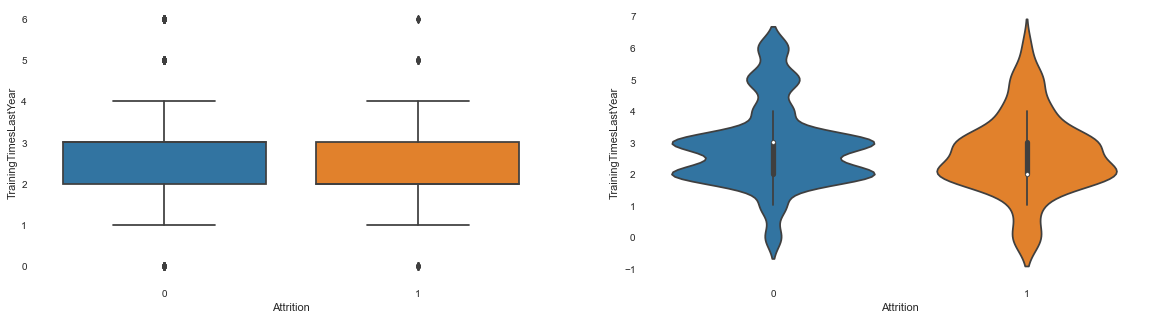

In [45]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.TrainingTimesLastYear)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.TrainingTimesLastYear)

**Employees who have received lesser training tend to stay, compared to those who have received more training.**

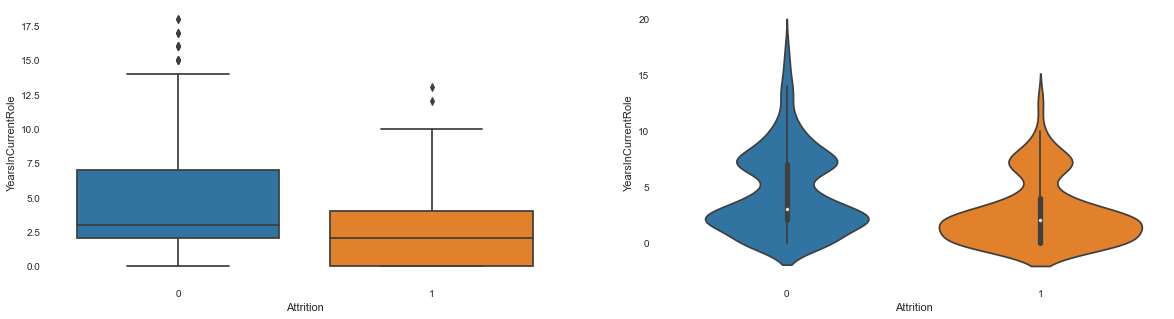

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.YearsInCurrentRole)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.YearsInCurrentRole)

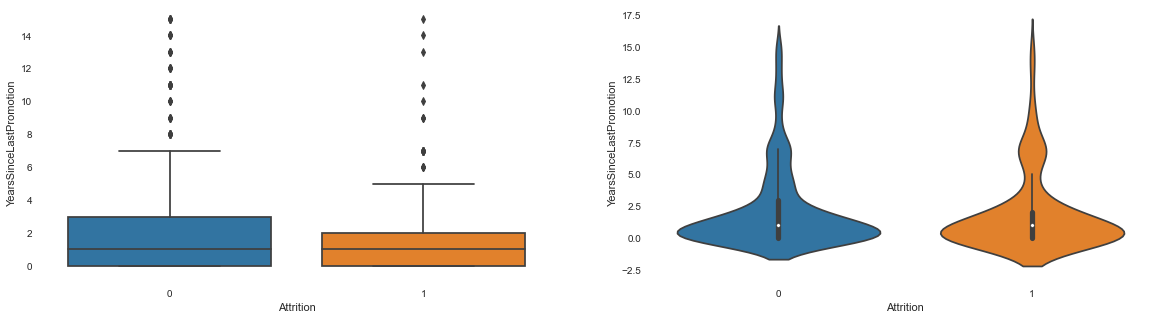

In [47]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.YearsSinceLastPromotion)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.YearsSinceLastPromotion)

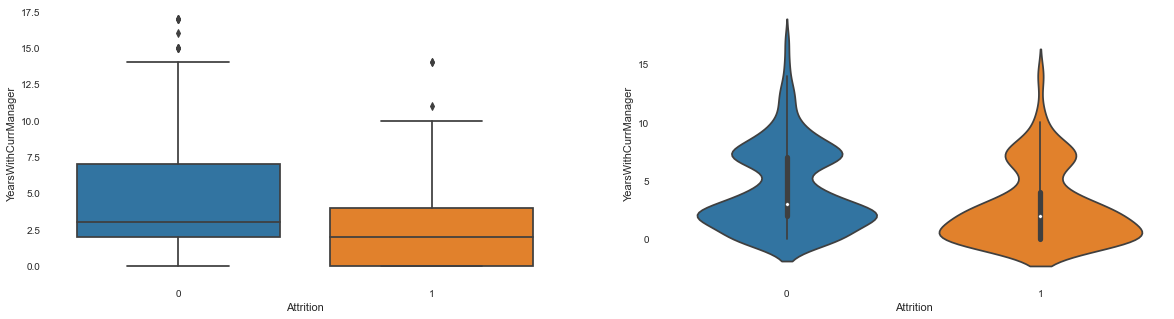

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.YearsWithCurrManager)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.YearsWithCurrManager)

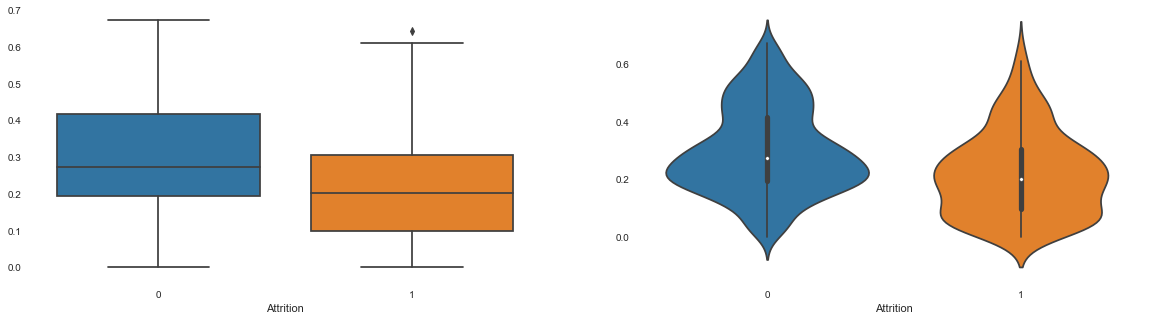

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.TotalWorkingYears / df.Age)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.TotalWorkingYears / df.Age)

**Observation from Profile: Employee number has unique values.! Strangeeee**

In [50]:
df.EducationField.unique()

array(['Medical', 'Life Sciences', 'Other', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [51]:
df.JobRole.unique()

array(['Laboratory Technician', 'Manufacturing Director',
       'Sales Executive', 'Research Scientist', 'Sales Representative',
       'Healthcare Representative', 'Research Director',
       'Human Resources', 'Manager'], dtype=object)

In [52]:
for ef in df.EducationField.unique():
    print(ef)
    print('='*50)
    print(df[df.EducationField == ef].JobRole.value_counts())
    print()

Medical
Research Scientist           79
Laboratory Technician        65
Sales Executive              47
Manufacturing Director       40
Healthcare Representative    35
Manager                      23
Research Director            22
Sales Representative         15
Human Resources               7
Name: JobRole, dtype: int64

Life Sciences
Research Scientist           90
Sales Executive              75
Laboratory Technician        75
Healthcare Representative    42
Manufacturing Director       42
Manager                      29
Research Director            21
Sales Representative         21
Human Resources               8
Name: JobRole, dtype: int64

Other
Laboratory Technician        16
Research Scientist           12
Healthcare Representative     7
Sales Executive               6
Manufacturing Director        6
Manager                       4
Human Resources               2
Research Director             2
Sales Representative          2
Name: JobRole, dtype: int64

Marketing
Sales Execu

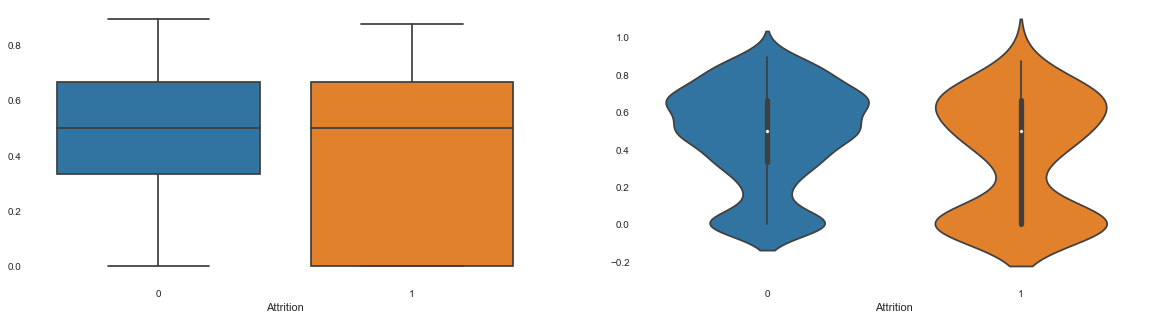

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.YearsWithCurrManager / (df.YearsAtCompany + 1))
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.YearsWithCurrManager / (df.YearsAtCompany + 1))

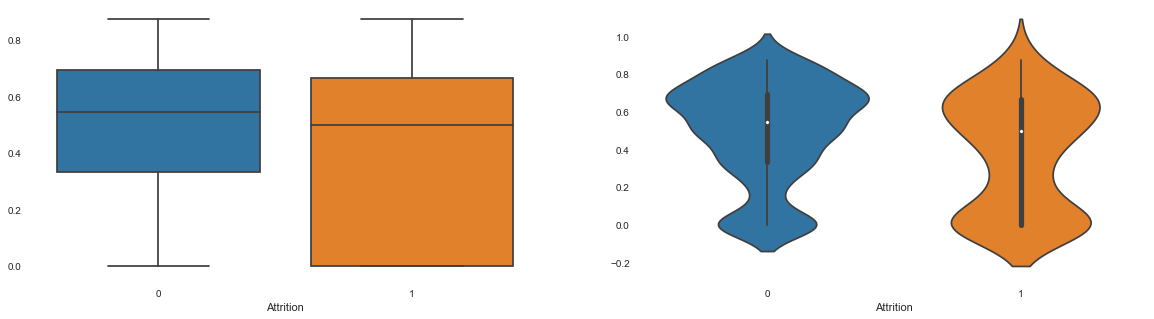

In [54]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.YearsInCurrentRole / (df.YearsAtCompany + 1))
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.YearsInCurrentRole / (df.YearsAtCompany + 1))

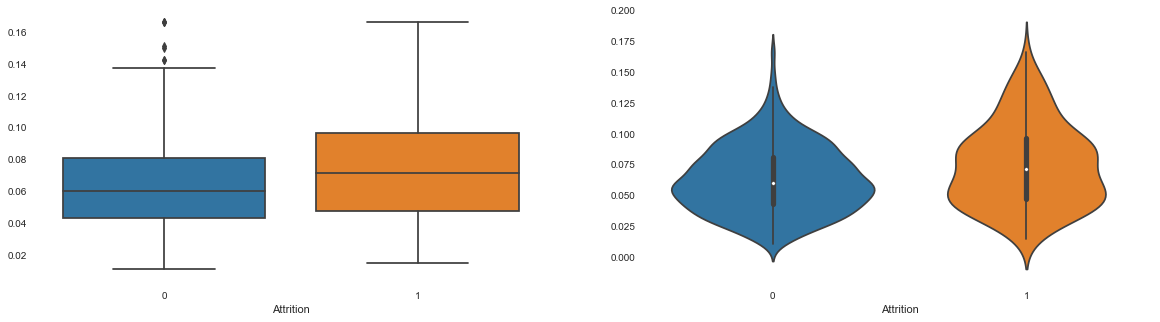

In [55]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.Education / (df.Age + df.TotalWorkingYears))
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.Education / (df.Age + df.TotalWorkingYears))

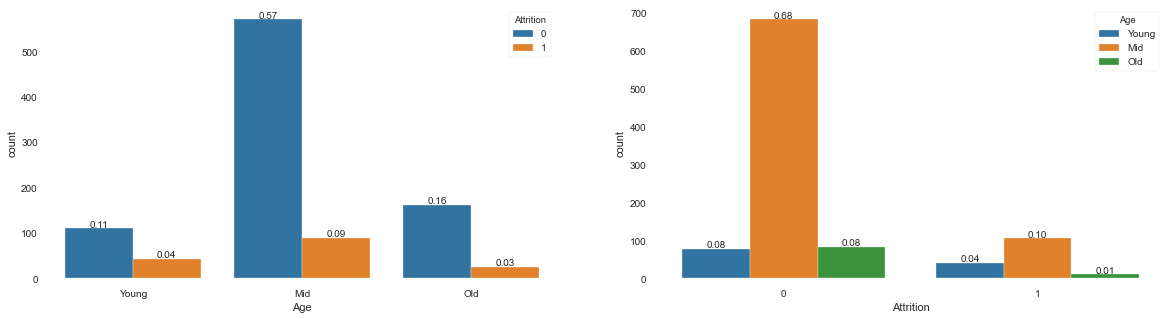

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = pd.cut(df.Age, bins = [0,27,45,np.inf], labels=['Young','Mid','Old']), hue = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(hue = pd.cut(df.Age, bins = [0,26,50,np.inf], labels=['Young','Mid','Old']), x = df.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

{'Laboratory Technician': 2705.0, 'Manufacturing Director': 5824.4000000000015, 'Sales Executive': 5675.8, 'Research Scientist': 2693.4, 'Sales Representative': 2325.8, 'Healthcare Representative': 6348.6, 'Research Director': 15014.600000000002, 'Human Resources': 2741.0, 'Manager': 16894.0}


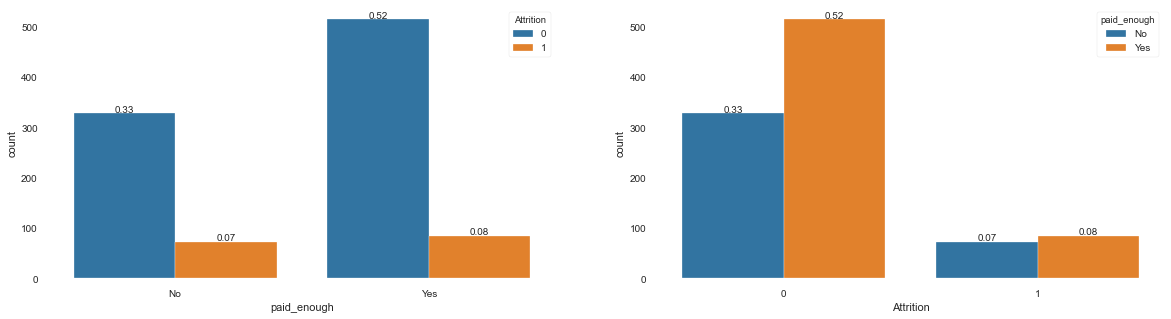

In [72]:
df_temp = df.copy()
q_pays = dict()
for role in df.JobRole.unique():
    q_pays[role] =  df_temp[df_temp.JobRole == role].MonthlyIncome.quantile(0.4)

print(q_pays)
df_temp['paid_enough'] = df_temp.apply(lambda x: 'No' if x.MonthlyIncome < q_pays.get(x.JobRole) else 'Yes', axis = 1)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = df_temp.paid_enough, hue = df_temp.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(x = df_temp.Attrition, hue = df_temp.paid_enough)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

{'Laboratory Technician': [2404.5, 2961.5, 3964.75], 'Manufacturing Director': [5131.0, 6499.0, 9547.0], 'Sales Executive': [5010.0, 6274.0, 8938.0], 'Research Scientist': [2394.0, 2875.0, 3904.0], 'Sales Representative': [2228.25, 2473.5, 2901.5], 'Healthcare Representative': [5433.75, 6714.0, 9689.5], 'Research Director': [13481.5, 16422.0, 18731.0], 'Human Resources': [2320.5, 2893.0, 6008.0], 'Manager': [16040.0, 17445.5, 19062.25]}


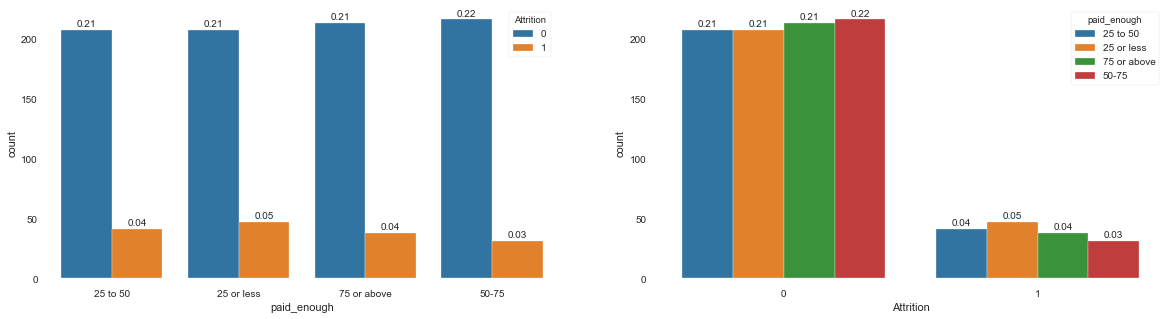

In [73]:
df_temp = df.copy()

def q25(x):
            return x.quantile(0.25)
def q50(x):
            return x.quantile(0.5)
def q75(x):
            return x.quantile(0.75)
    
def paid_enough(pay, qtiles):
    if pay <= qtiles[0]:
        return '25 or less'
    if pay <= qtiles[1]:
        return '25 to 50'
    if pay <= qtiles[2]:
        return '50-75'
    return '75 or above'


q_pays = dict()
for role in df.JobRole.unique():
    qtiles = [q25, q50, q75]
    q_pays[role] =  df_temp[df_temp.JobRole == role].MonthlyIncome.agg([q25, q50, q75]).to_list()

print(q_pays)
df_temp['paid_enough'] = df_temp.apply(lambda x: paid_enough(x.MonthlyIncome, q_pays[x.JobRole]), axis = 1)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = df_temp.paid_enough, hue = df_temp.Attrition)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.subplot(1,2,2)
ax = sns.countplot(x = df_temp.Attrition, hue = df_temp.paid_enough)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

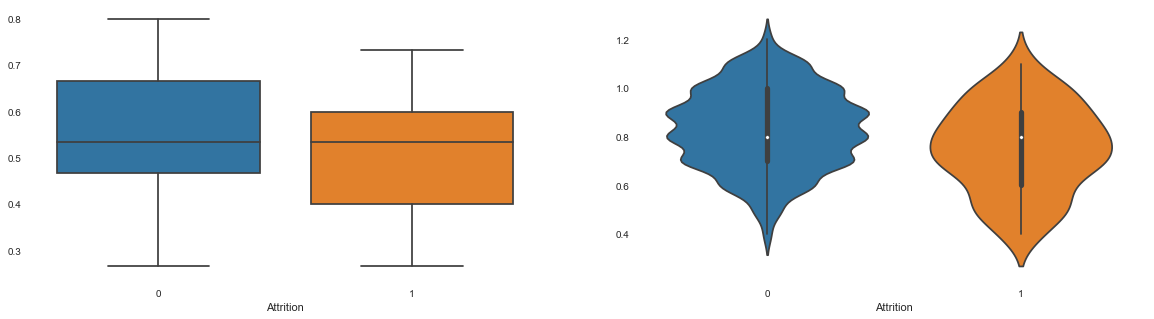

In [58]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = (df.EnvironmentSatisfaction+df.JobSatisfaction+df.JobInvolvement) / 15)
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = (df.EnvironmentSatisfaction+df.JobSatisfaction+df.JobInvolvement) / 10)

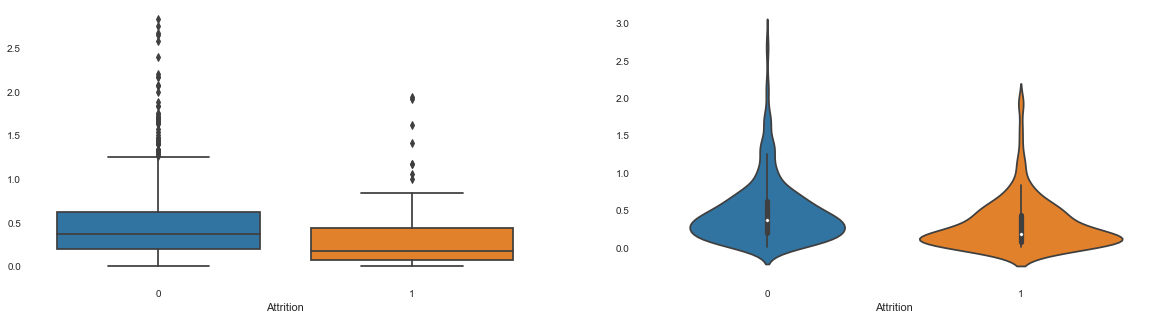

In [59]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = df.Attrition, y = df.YearsAtCompany/(df.PercentSalaryHike+1))
plt.subplot(1,2,2)
sns.violinplot(x = df.Attrition, y = df.YearsAtCompany/(df.PercentSalaryHike+1))

### Feature Selection

In [60]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [61]:
df_sel = df_org.copy()
no_use_cols = ['Id','Behaviour','Gender','Education', 'PerformanceRating', 'EmployeeNumber']
df_sel.drop(no_use_cols, inplace=True, axis=1)
df_sel.drop_duplicates(inplace=True)
df_sel = pd.get_dummies(df_sel, columns=df_sel.select_dtypes(include='object').columns.to_list())
X = df_sel.drop(['Attrition'], axis=1)
y = df_sel['Attrition']
rfe = RFE(RandomForestClassifier(), 20)
rfe.fit(X, y)
df_sel.drop(['Attrition'], axis=1).columns[rfe.get_support()]

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'BusinessTravel_Travel_Frequently', 'MaritalStatus_Single',
       'OverTime_No', 'OverTime_Yes'],
      dtype='object')

In [62]:
df_sel = df_org.copy()
no_use_cols = ['Id','Behaviour','PerformanceRating','Gender','Education', 'TrainingTimesLastYear','PercentSalaryHike','Department', 'EmployeeNumber']
df_sel.drop(no_use_cols, inplace=True, axis=1)
df_sel.drop_duplicates(inplace=True)
df_sel = pd.get_dummies(df_sel, columns=df_sel.select_dtypes(include='object').columns.to_list())
X = df_sel.drop(['Attrition'], axis=1)
y = df_sel['Attrition']
rfe = RFE(RandomForestClassifier(), 20)
rfe.fit(X, y)
df_sel.drop(['Attrition'], axis=1).columns[rfe.get_support()]

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CommunicationSkill', 'BusinessTravel_Travel_Frequently',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes'],
      dtype='object')

### Feature Engineering and Profiling

In [63]:
df_mod = df_org.copy()
no_use_cols = ['Id',
               'Behaviour',
               'PerformanceRating',
               'Gender',
               'Education', 
               'Department',
               'EmployeeNumber']
df_mod.drop(no_use_cols, inplace=True, axis=1)
df_mod.drop_duplicates(inplace=True)

import pandas_profiling
profile = df_mod.profile_report(title='Employee_Attrition_Profile_Dataset')
!mkdir Profile_Report
profile.to_file(output_file='Profile_Report/Employee_Attrition_Report_2.html')

mkdir: Profile_Report: File exists


In [64]:
df_mod = df_org.copy()
no_use_cols = ['Id',
               'Behaviour',
               'PerformanceRating',
               'Gender',
               'Education', 
               'Department',
               'EmployeeNumber',
               'PercentSalaryHike',
               'YearsInCurrentRole',
               'YearsSinceLastPromotion',
               'YearsWithCurrManager'
              ]
df_mod.drop(no_use_cols, inplace=True, axis=1)
df_mod.drop_duplicates(inplace=True)

import pandas_profiling
profile = df_mod.profile_report(title='Employee_Attrition_Profile_Dataset')
!mkdir Profile_Report
profile.to_file(output_file='Profile_Report/Employee_Attrition_Report_3.html')

mkdir: Profile_Report: File exists


In [65]:
df_mod = df_org.copy()
df_mod['OwnStocks'] = df_mod.StockOptionLevel.apply(lambda x: 0 if x == 0 else 1)
df_mod['PropWorkLife'] = df_mod.TotalWorkingYears / df_mod.Age
no_use_cols = ['Id',
               'Behaviour',
               'PerformanceRating',
               'Gender',
               'Education', 
               'Department',
               'EmployeeNumber',
               'PercentSalaryHike',
               'YearsInCurrentRole',
               'YearsSinceLastPromotion',
               'YearsWithCurrManager',
               
               'StockOptionLevel',
               'TotalWorkingYears'
              ]
df_mod.drop(no_use_cols, inplace=True, axis=1)
df_mod.drop_duplicates(inplace=True)

import pandas_profiling
profile = df_mod.profile_report(title='Employee_Attrition_Profile_Dataset')
!mkdir Profile_Report
profile.to_file(output_file='Profile_Report/Employee_Attrition_Report_4.html')

mkdir: Profile_Report: File exists


In [66]:
df_mod = df_org.copy()
df_mod['OwnStocks'] = df_mod.StockOptionLevel.apply(lambda x: 0 if x == 0 else 1)
df_mod['PropWorkLife'] = df_mod.TotalWorkingYears / df_mod.Age
no_use_cols = ['Id',
               'Behaviour',
               'PerformanceRating',
               'Gender',
               'Education', 
               'Department',
               'EmployeeNumber',
               'PercentSalaryHike',
               'YearsInCurrentRole',
               'YearsSinceLastPromotion',
               'YearsWithCurrManager',
               
               'JobRole',
               'YearsAtCompany',
               
               'StockOptionLevel',
               'TotalWorkingYears'
              ]
df_mod.drop(no_use_cols, inplace=True, axis=1)
df_mod.drop_duplicates(inplace=True)

import pandas_profiling
profile = df_mod.profile_report(title='Employee_Attrition_Profile_Dataset')
!mkdir Profile_Report
profile.to_file(output_file='Profile_Report/Employee_Attrition_Report_5.html')

mkdir: Profile_Report: File exists


In [67]:
df_mod = df_org.copy()
df_mod['OwnStocks'] = df_mod.StockOptionLevel.apply(lambda x: 0 if x == 0 else 1)
df_mod['PropWorkLife'] = df_mod.TotalWorkingYears / df_mod.Age
no_use_cols = ['Id',
               'Behaviour',
               'PerformanceRating',
               'Gender',
               'Education', 
               'Department',
               'EmployeeNumber',
               'PercentSalaryHike',
               'YearsInCurrentRole',
               'YearsSinceLastPromotion',
               'YearsWithCurrManager',
               
               'JobRole',
               'YearsAtCompany',
               'Age',
               'StockOptionLevel',
               'TotalWorkingYears'
              ]
df_mod.drop(no_use_cols, inplace=True, axis=1)
df_mod.drop_duplicates(inplace=True)

import pandas_profiling
profile = df_mod.profile_report(title='Employee_Attrition_Profile_Dataset')
!mkdir Profile_Report
profile.to_file(output_file='Profile_Report/Employee_Attrition_Report_6.html')

mkdir: Profile_Report: File exists


In [68]:
df_mod = df_org.copy()
df_mod['OwnStocks'] = df_mod.StockOptionLevel.apply(lambda x: 0 if x == 0 else 1)
df_mod['PropWorkLife'] = df_mod.TotalWorkingYears / df_mod.Age
df_mod['PropExpComp'] = df_mod.TotalWorkingYears / (df_mod.NumCompaniesWorked+1)
no_use_cols = [
                    'Id',
                    'Behaviour',
                    'PerformanceRating',
                    'Gender',
                    'Education', 
                    'Department',
                    'EmployeeNumber',
                    'PercentSalaryHike',
                    'YearsInCurrentRole',
                    'YearsSinceLastPromotion',
                    'YearsWithCurrManager',
                    'JobInvolvement',
                    'EducationField',
                    'YearsAtCompany',
                    'Age',
                    'StockOptionLevel',
                    'TotalWorkingYears',
                    'NumCompaniesWorked'
                  ]
df_mod.drop(no_use_cols, inplace=True, axis=1)
df_mod.drop_duplicates(inplace=True)

import pandas_profiling
profile = df_mod.profile_report(title='Employee_Attrition_Profile_Dataset')
!mkdir Profile_Report
profile.to_file(output_file='Profile_Report/Employee_Attrition_Report_7.html')

mkdir: Profile_Report: File exists


In [69]:
df_mod = df_org.copy()
df_mod['OwnStocks'] = df_mod.StockOptionLevel.apply(lambda x: 0 if x == 0 else 1)
df_mod['PropWorkLife'] = df_mod.TotalWorkingYears / df_mod.Age
df_mod['PropExpComp'] = df_mod.TotalWorkingYears / (df_mod.NumCompaniesWorked+1)
df_mod['PropRoleComp'] = df_mod.YearsInCurrentRole / (df_mod.YearsAtCompany + 1)
df_mod['PropEducationAgeWy'] = df_mod.Education / (df_mod.Age + df_mod.TotalWorkingYears)

no_use_cols = [
                    'Id',
                    'Behaviour',
                    'PerformanceRating',
                    'Gender',
                    'Education', 
                    'Department',
                    'EmployeeNumber',
                    'PercentSalaryHike',
                    'YearsInCurrentRole',
                    'YearsSinceLastPromotion',
                    'YearsWithCurrManager',
                    'JobInvolvement',
                    'EducationField',
                    'YearsAtCompany',
                    'Age',
                    'StockOptionLevel',
                    'MonthlyIncome',
                    'TotalWorkingYears',
                    'NumCompaniesWorked'
                  ]
df_mod.drop(no_use_cols, inplace=True, axis=1)
df_mod.drop_duplicates(inplace=True)

import pandas_profiling
profile = df_mod.profile_report(title='Employee_Attrition_Profile_Dataset')
!mkdir Profile_Report
profile.to_file(output_file='Profile_Report/Employee_Attrition_Report_8.html')

mkdir: Profile_Report: File exists


In [70]:
df_mod = df_org.copy()
df_mod['OwnStocks'] = df_mod.StockOptionLevel.apply(lambda x: 0 if x == 0 else 1)
df_mod['PropWorkLife'] = df_mod.TotalWorkingYears / df_mod.Age
df_mod['PropExpComp'] = df_mod.NumCompaniesWorked/ (df_mod.TotalWorkingYears+1)
df_mod['AgeBar'] = pd.cut(df_mod.Age, bins = [0,27,45,np.inf], labels=['Young','Mid','Old']).astype('object')
df_mod['PropRoleComp'] = df_mod.YearsInCurrentRole / (df_mod.YearsAtCompany + 1)
q_pays = {
        'Laboratory Technician': 2705.0, 
        'Manufacturing Director': 5824.4000000000015, 
        'Sales Executive': 5675.8, 
        'Research Scientist': 2693.4, 
        'Sales Representative': 2325.8, 
        'Healthcare Representative': 6348.6, 
        'Research Director': 15014.600000000002, 
        'Human Resources': 2741.0, 
        'Manager': 16894.0
    }
df_mod['AboveQPay'] = df_mod.apply(lambda x: 'No' if x.MonthlyIncome < q_pays.get(x.JobRole) else 'Yes', axis = 1)
df_mod['WorkFactors'] = (df_mod.EnvironmentSatisfaction+df_mod.JobSatisfaction+df_mod.JobInvolvement) / 15
#df_mod['PropCompYrsHike'] = df_mod.YearsAtCompany/(df_mod.PercentSalaryHike+1)

no_use_cols = [
                    'Id',
                    'Behaviour',
                    'PerformanceRating',
                    'Gender',
                    'Education', 
                    'Department',
                    'EmployeeNumber',
                    'PercentSalaryHike',
                    'YearsInCurrentRole',
                    'YearsSinceLastPromotion',
                    'YearsWithCurrManager',
                    'TrainingTimesLastYear',
                    'EducationField',
                    'StockOptionLevel',
                    'TotalWorkingYears',
                    'YearsAtCompany',
                    'NumCompaniesWorked',
                    'JobSatisfaction',
                    'EnvironmentSatisfaction',
                    'JobInvolvement',
                    'Age',
                    'MonthlyIncome',
                    'DistanceFromHome'
                  ]
df_mod.drop(no_use_cols, inplace=True, axis=1)
df_mod.drop_duplicates(inplace=True)

import pandas_profiling
profile = df_mod.profile_report(title='Employee_Attrition_Profile_Dataset')
!mkdir Profile_Report
profile.to_file(output_file='Profile_Report/Employee_Attrition_Report_9.html')

mkdir: Profile_Report: File exists
